# Initialize

In [1]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std, compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "../results/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-08 13:24:53.921677: Importing os...
2024-04-08 13:24:53.921843: Importing sys...
Visible devices: [0]
2024-04-08 13:24:53.922242: Importing timer from timeit...
2024-04-08 13:24:53.922352: Setting env variables for tf import (only device(s) [0] will be available)...
2024-04-08 13:24:53.922660: Importing numpy...
2024-04-08 13:24:54.036746: Importing matplotlib...


2024-04-08 13:24:54.359478: Importing h5py...
2024-04-08 13:24:54.381706: Importing importlib.util...
2024-04-08 13:24:54.381813: Importing json...
2024-04-08 13:24:54.381877: Importing pandas...
2024-04-08 13:24:54.678008: Importing random...
2024-04-08 13:24:54.678185: Importing scipy utils...
2024-04-08 13:24:55.015895: Importing subprocess...
2024-04-08 13:24:55.016070: Importing tensorflow...
Tensorflow version: 2.12.0
2024-04-08 13:24:57.148119: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-08 13:24:57.427499: Importing timeit...
2024-04-08 13:24:57.427608: Importing tqdm...
2024-04-08 13:24:57.431314: Importing typing...
2024-04-08 13:24:57.431437: Setting tf configs...
2024-04-08 13:24:57.730781: Importing GMetrics module...
2024-04-08 13:24:59.889014: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A40
Loaded 1 GPUs: ['NVIDIA A40']
2024-04-08 13:24:59.936320: All done.


# Fixed $n=10000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
batch_size_test = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [7]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,10000,10000,10000000,float64,0,True,False,None,True,...,5,0,True,5,0,float64,5,100000000,False,3


In [8]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 5000, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 4, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 100000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 5000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/5D_10K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'metr

### Evaluate null hypotheses

In [9]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/5D_10K/null_hypothesis/FN.json
Computing and savng fpd with max_vectorize = 1000

------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 10
Iterating from 0 to 1000 out of 10000 .


Iterating from 1000 to 2000 out of 10000 .
Iterating from 2000 to 3000 out of 10000 .
Iterating from 3000 to 4000 out of 10000 .
Iterating from 4000 to 5000 out of 10000 .
Iterating from 5000 to 6000 out of 10000 .
Iterating from 6000 to 7000 out of 10000 .
Iterating from 7000 to 8000 out of 10000 .
Iterating from 8000 to 9000 out of 10000 .
Iterating from 9000 to 10000 out of 10000 .
FPD metric calculation completed in 301.88383865356445 seconds.
Saving fpd to ../results/5D_10K/null_hypothesis/FPD.json
Loading kpd from ../results/5D_10K/null_hypothesis/KPD.json
Loading ks from ../results/5D_10K/null_hypothesis/KS.json
Loading sks from ../results/5D_10K/null_hypothesis/SKS.json
Loading swd from ../results/5D_10K/null_hypothesis/SWD.json


In [10]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7325348105633029], [0.95, [9500, 500], 1.208377069509802], [0.99, [9900, 100], 1.5463530858752372]]
Computing time for metric fn: 30.836626265197992
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.00010175550386551708], [0.95, [9500, 500], 0.00015583746551772079], [0.99, [9900, 100], 0.00022347410983350775]]
Computing time for metric fpd: 301.88383865356445
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.051065851112846554], [0.95, [9500, 500], 0.2974065091433491], [0.99, [9900, 100], 0.5759258470980705]]
Computing time for metric kpd: 6290.699656017125
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9149967015224115], [0.95, [9500, 500], 1.1370277746174993], [0.99, [9900, 100], 1.291177133500941]]
Computing time for metric ks: 58.25171937048435
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9094811805338137], [0.95, [9500, 500], 1.112986448315256], [0.99, [9900, 100], 1.2742067049480295]]
Computing time for metric sks: 1323

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f144534e560>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",5000,$\overline{\|\cdot\|}_{F}$,../results/5D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.7325348105633029], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f144534e200>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",1000,$d_{\mathrm{FPD}}$,../results/5D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 0.00010175550386551708],..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f156cbe7490>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",4,$d_{\mathrm{KPD}}$,../results/5D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.051065851112846554], [..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f14453d4040>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\overline{D}$,../results/5D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9149967015224115], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f14453d40d0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",1000,$\widetilde{D}$,../results/5D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9094811805338137], [0...."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f14453d4160>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\widetilde{W}$,../results/5D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.6846650651711172], [0...."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f14453d41f0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",2000,$t_{\mu}$,../results/5D_10K/null_hypothesis/LR.json,[]


### Plots of null-distributions

mu = 0.6512007667914811 +/- 0.0008385217364996528
sigma = 0.28957239794214723 +/- 0.0028013412573834767


/tmp/ipykernel_26482/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26482/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26482/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26482/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


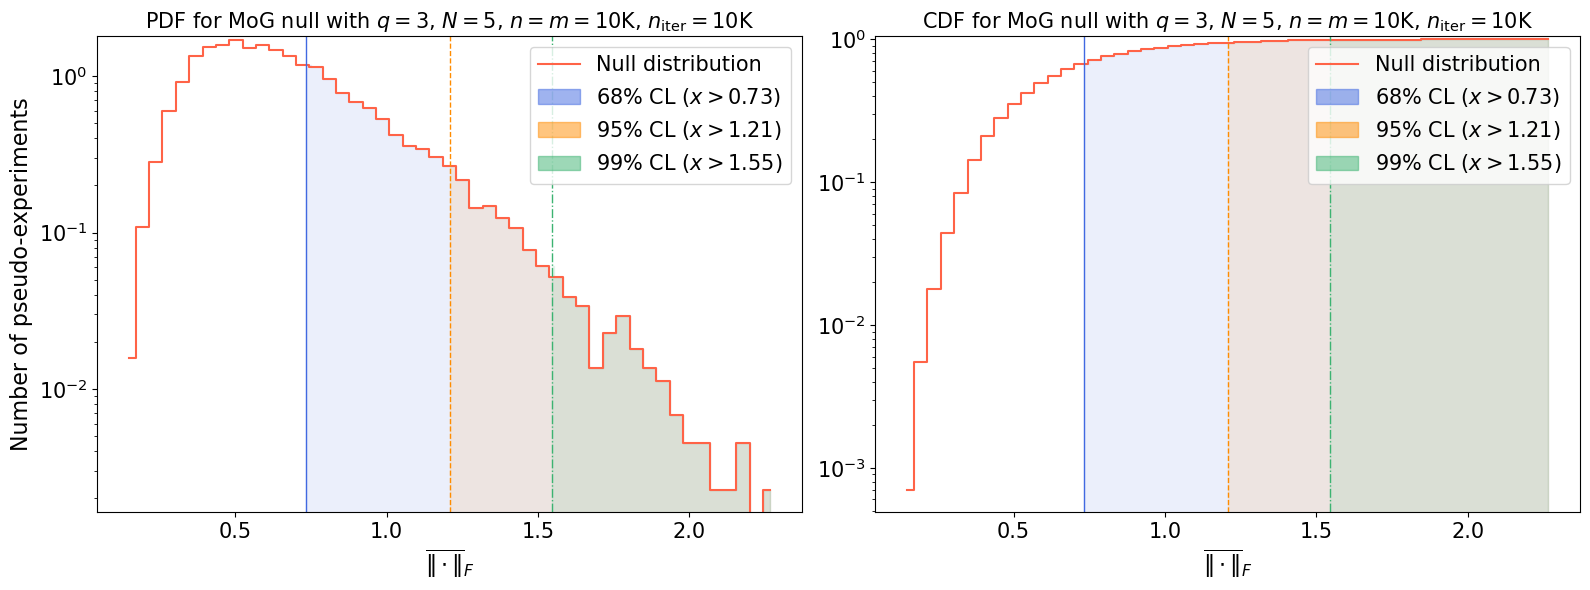

Time elapsed: 2.0144959650933743 seconds.
mu = 7.70602764568853e-05 +/- 2.1730387386782493e-11
sigma = 4.661586359468469e-05 +/- 5.199763058060317e-07


/tmp/ipykernel_26482/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26482/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26482/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26482/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


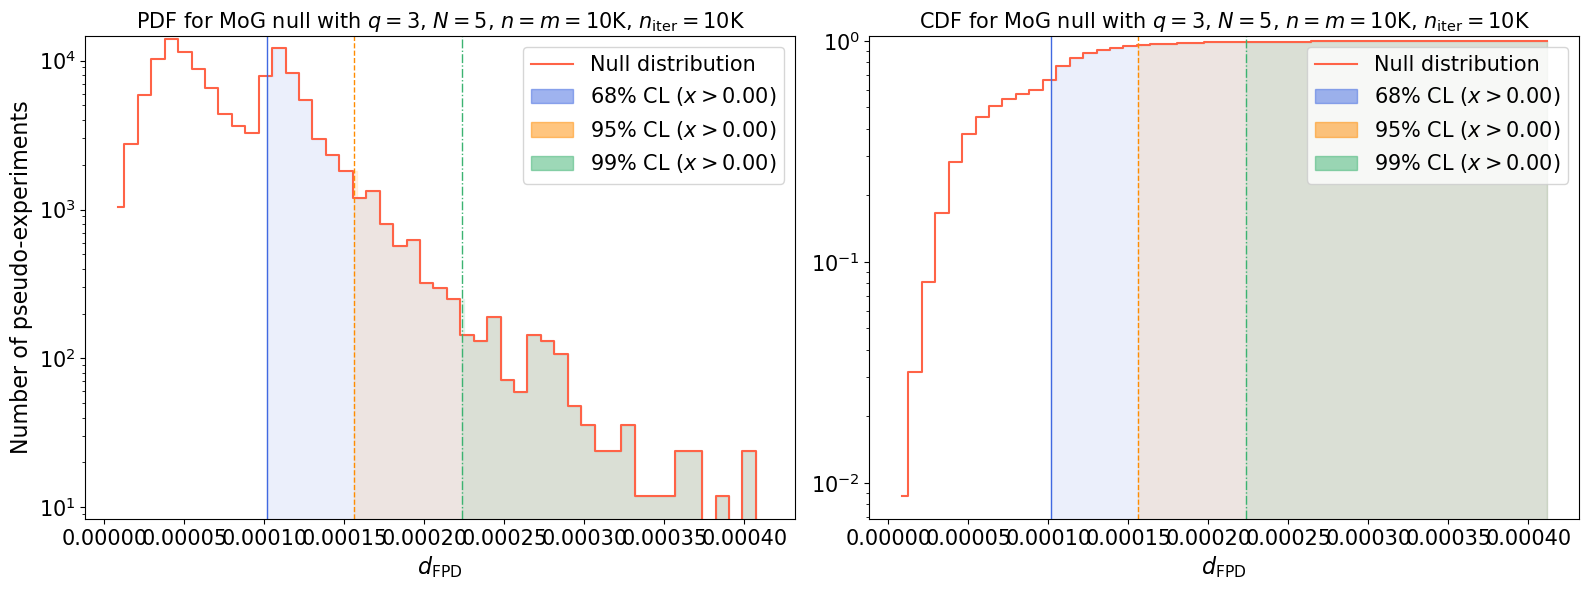

Time elapsed: 1.4368892349302769 seconds.
mu = 0.028566655617524805 +/- 0.00021620879711609642
sigma = 0.14704040163033302 +/- 0.0024724943250283636


/tmp/ipykernel_26482/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26482/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26482/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26482/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


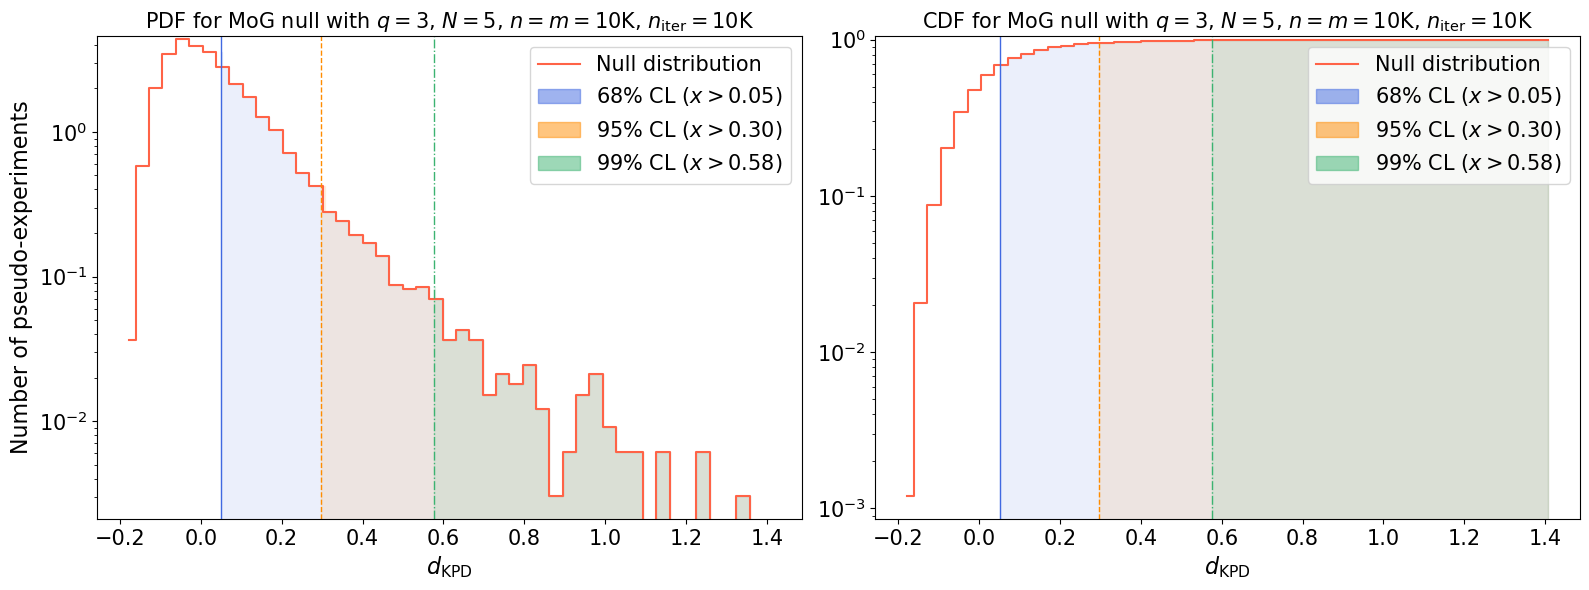

Time elapsed: 1.453660923987627 seconds.
mu = 0.8657148748552179 +/- 0.00021165357583810118
sigma = 0.1454831866017861 +/- 0.001284495140076281


/tmp/ipykernel_26482/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26482/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26482/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26482/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


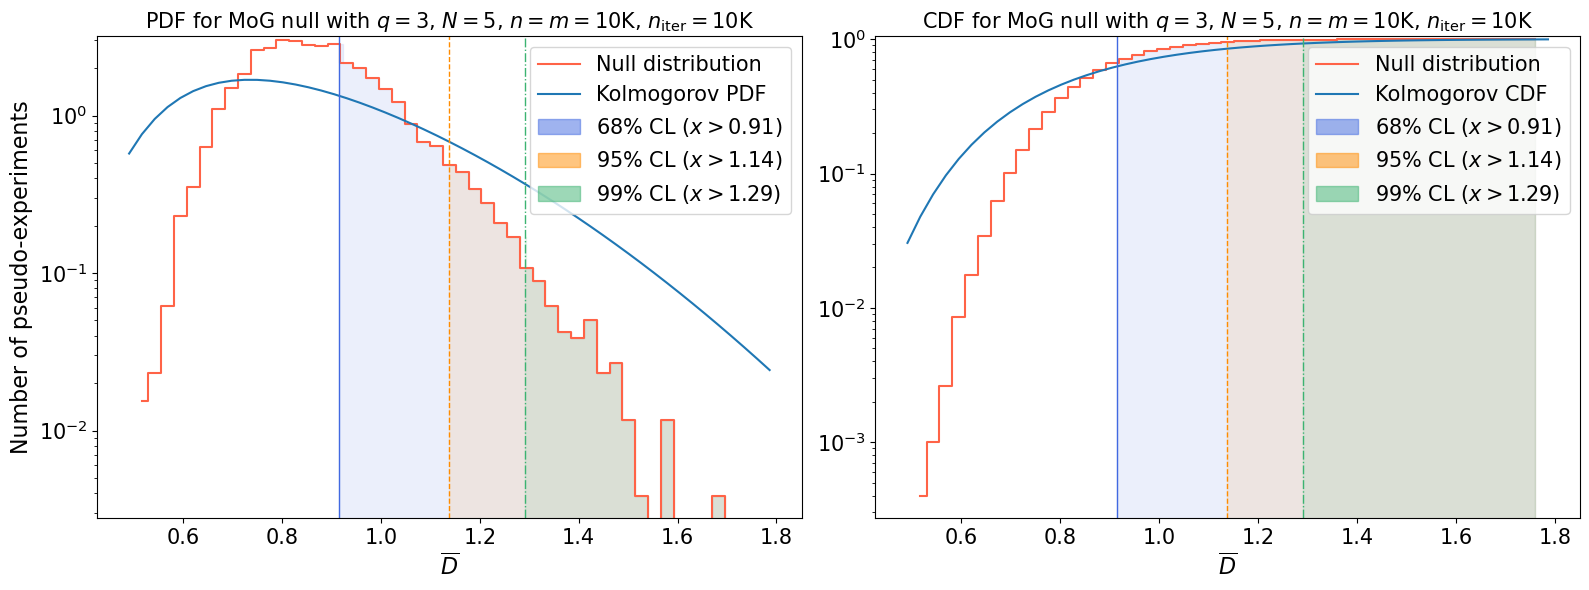

Time elapsed: 1.921381264925003 seconds.
mu = 0.8663440549189074 +/- 0.0001759854097144226
sigma = 0.13265949257946927 +/- 0.0012042664783179845


/tmp/ipykernel_26482/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26482/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26482/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26482/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


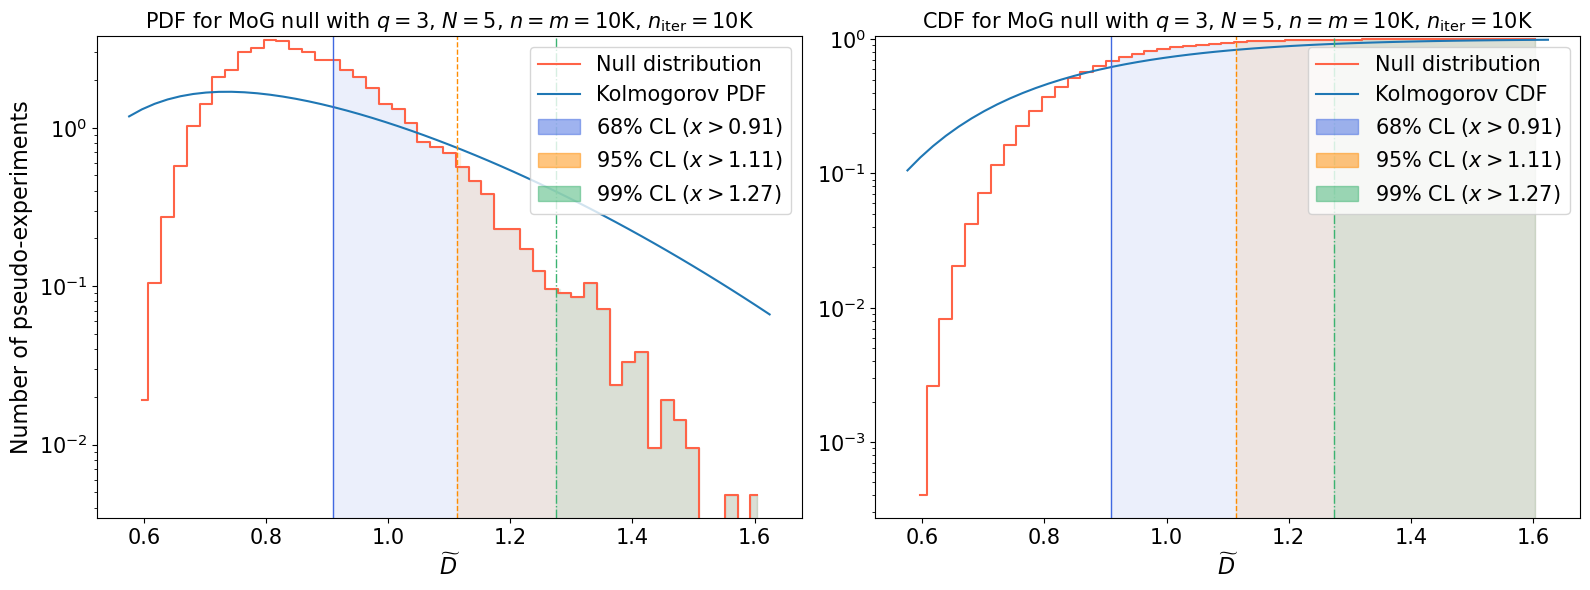

Time elapsed: 1.6769824847579002 seconds.
mu = 0.6334066155245102 +/- 0.0003345339556358687
sigma = 0.18290269424911942 +/- 0.0017628046230168954


/tmp/ipykernel_26482/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26482/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26482/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26482/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


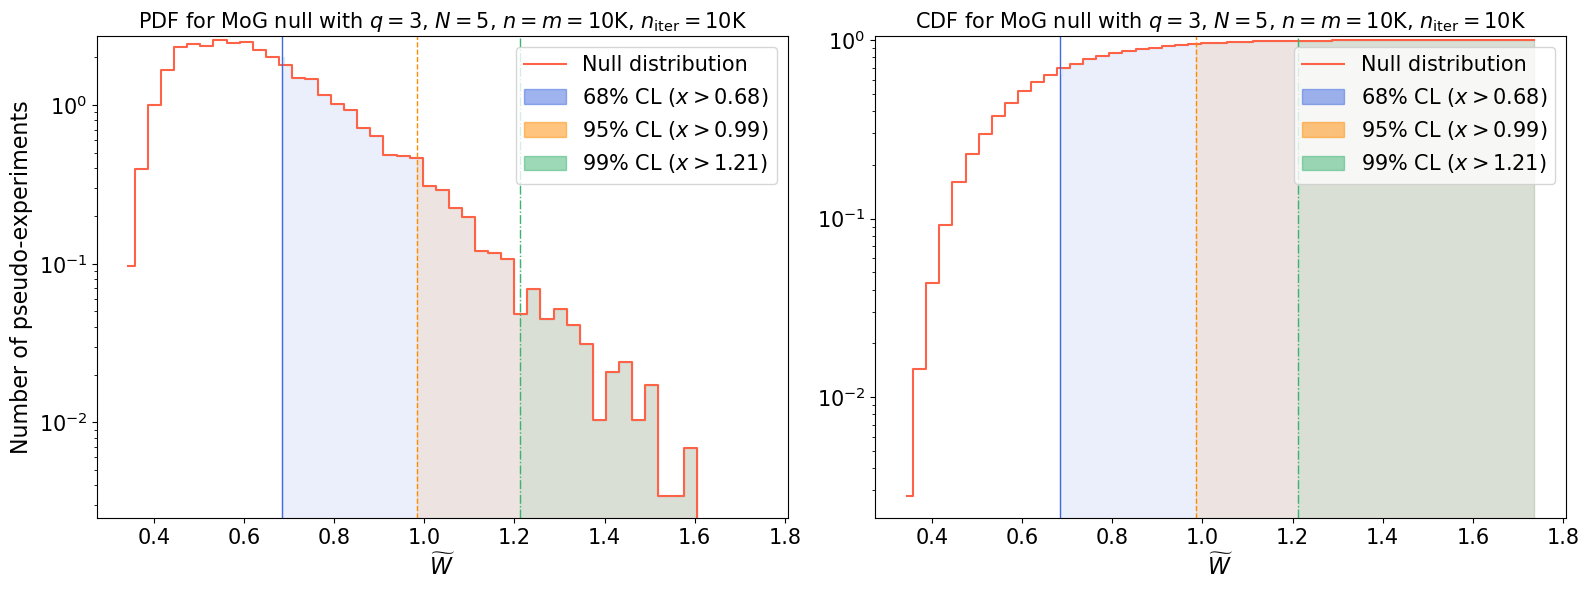

Time elapsed: 1.3008441291749477 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f144534e560>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",5000,$\overline{\|\cdot\|}_{F}$,../results/5D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.7325348105633029], [0....",../results/5D_10K/null_hypothesis/FN.pdf
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f144534e200>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",1000,$d_{\mathrm{FPD}}$,../results/5D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 0.00010175550386551708],...",../results/5D_10K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f156cbe7490>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",4,$d_{\mathrm{KPD}}$,../results/5D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.051065851112846554], [...",../results/5D_10K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f14453d4040>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\overline{D}$,../results/5D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9149967015224115], [0....",../results/5D_10K/null_hypothesis/KS.pdf
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f14453d40d0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",1000,$\widetilde{D}$,../results/5D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9094811805338137], [0....",../results/5D_10K/null_hypothesis/SKS.pdf
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f14453d4160>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\widetilde{W}$,../results/5D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.6846650651711172], [0....",../results/5D_10K/null_hypothesis/SWD.pdf
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f14453d41f0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",2000,$t_{\mu}$,../results/5D_10K/null_hypothesis/LR.json,[],NaN


In [11]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [11]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [12]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [13]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [14]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [15]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Exclusion limits for LR with both deformation already loaded.
dict_keys(['2024-03-27T15:25:28.505539', '2024-03-27T15:29:13.896103', '2024-03-27T15:32:28.367939', '2024-03-27T15:35:50.551724', '2024-03-27T15:42:04.917750', '2024-03-27T15:47:13.043559', '2024-03-27T19:01:54.381146', '2024-03-27T19:09:02.664121', '2024-03-27T19:11:37.538802', '2024-03-27T19:18:59.314853', '2024-03-27T19:22:46.937577', '2024-03-27T19:26:08.163442', '2024-03-27T19:30:05.393453', '2024-03-27T19:35:18.303055', '2024-03-27T19:39:59.606321', '2024-03-27T19:45:23.716370', '2024-03-27T19:49:15.007247', '2024-03-27T19:52:40.768322', '2024-03-28T18:35:30.408005', '2024-03-28T19:01:04.363074', '2024-03-28T19:25:18.248730'])


### Show and save results

In [16]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [17]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [18]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,mean,5,10000,10000,0.00115,0.00157,1533
9,ks,mean,5,10000,10000,0.01010,0.01342,227
12,sks,mean,5,10000,10000,0.02338,0.03399,312
15,swd,mean,5,10000,10000,0.04333,0.06272,231
3,fpd,mean,5,10000,10000,0.06177,0.08811,374
0,fn,mean,5,10000,10000,0.06372,0.08635,225
6,kpd,mean,5,10000,10000,0.07837,0.10852,428


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,0.00115,0.00157,1533
9,ks,0.01010,0.01342,227
12,sks,0.02338,0.03399,312
15,swd,0.04333,0.06272,231
3,fpd,0.06177,0.08811,374
0,fn,0.06372,0.08635,225
6,kpd,0.07837,0.10852,428


In [19]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,std,5,10000,10000,0.00140,0.00212,1453
10,ks,std,5,10000,10000,0.02551,0.03253,201
13,sks,std,5,10000,10000,0.05542,0.08056,281
16,swd,std,5,10000,10000,0.09399,0.13514,205
4,fpd,std,5,10000,10000,0.13818,0.19794,308
1,fn,std,5,10000,10000,0.17139,0.25150,194
7,kpd,std,5,10000,10000,0.99609,0.99805,154


,Statistic,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,0.00140,0.00212,1453
10,ks,0.02551,0.03253,201
13,sks,0.05542,0.08056,281
16,swd,0.09399,0.13514,205
4,fpd,0.13818,0.19794,308
1,fn,0.17139,0.25150,194
7,kpd,0.99609,0.99805,154


In [20]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,both,5,10000,10000,0.00091,0.00126,1600
11,ks,both,5,10000,10000,0.00870,0.01151,237
14,sks,both,5,10000,10000,0.02057,0.02954,324
17,swd,both,5,10000,10000,0.03845,0.05559,210
5,fpd,both,5,10000,10000,0.05737,0.08200,382
2,fn,both,5,10000,10000,0.05884,0.07975,202
8,kpd,both,5,10000,10000,0.07837,0.10852,441


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,0.00091,0.00126,1600
11,ks,0.00870,0.01151,237
14,sks,0.02057,0.02954,324
17,swd,0.03845,0.05559,210
5,fpd,0.05737,0.08200,382
2,fn,0.05884,0.07975,202
8,kpd,0.07837,0.10852,441


In [29]:
result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$")

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$t^{\mathrm{null}}$ (s)
0,$t_{\mathrm{LLR}}$,0.00115,0.00157,1533,0.00140,0.00212,1453,0.00091,0.00126,1600,-
1,$\overline{D}$,0.01010,0.01342,227,0.02551,0.03253,201,0.00870,0.01151,237,335
2,$\widetilde{D}$,0.02338,0.03399,312,0.05542,0.08056,281,0.02057,0.02954,324,1323
3,$\widetilde{W}$,0.04333,0.06272,231,0.09399,0.13514,205,0.03845,0.05559,210,718
4,$d_{\mathrm{FPD}}$,0.06177,0.08811,374,0.13818,0.19794,308,0.05737,0.08200,382,1305
5,fn,0.06372,0.08635,225,0.17139,0.25150,194,0.05884,0.07975,202,250
6,kpd,0.07837,0.10852,428,0.99609,0.99805,154,0.07837,0.10852,441,17811


In [30]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$t^{\mathrm{null}}$ (s)
0,$t_{\mathrm{LLR}}$,0.00115,0.00157,1533,0.00140,0.00212,1453,0.00091,0.00126,1600,-
1,$\overline{D}$,0.01010,0.01342,227,0.02551,0.03253,201,0.00870,0.01151,237,335
2,$\widetilde{D}$,0.02338,0.03399,312,0.05542,0.08056,281,0.02057,0.02954,324,1323
3,$\widetilde{W}$,0.04333,0.06272,231,0.09399,0.13514,205,0.03845,0.05559,210,718
4,$d_{\mathrm{FPD}}$,0.06177,0.08811,374,0.13818,0.19794,308,0.05737,0.08200,382,1305
5,$\overline{\|\cdot\|}_{F}$,0.06372,0.08635,225,0.17139,0.25150,194,0.05884,0.07975,202,250
6,$d_{\mathrm{KPD}}$,0.07837,0.10852,428,0.99609,0.99805,154,0.07837,0.10852,441,17811


\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.0011 & 0.0016 & 1533 & 0.0014 & 0.0021 & 1453 & 0.00091 & 0.0013 & 1600 & - \\
$\overline{D}$ & 0.01 & 0.013 & 227 & 0.026 & 0.033 & 201 & 0.0087 & 0.012 & 237 & 335 \\
$\widetilde{D}$ & 0.023 & 0.034 & 312 & 0.055 & 0.081 & 281 & 0.021 & 0.03 & 324 & 1323 \\
$\widetilde{W}$ & 0.043 & 0.063 & 231 & 0.094 & 0.14 & 205 & 0.038 & 0.056 & 210 & 718 \\
$d_{\mathrm{FPD}}$ & 0.062 & 0.088 & 374 & 0.14 & 0.2 & 308 & 0.057 & 0.082 & 382 & 1305 \\
$\overline{\|\cdot\|}_{F}$ & 0.064 & 0.086 & 225 & 0.17 & 0.25 & 194 & 0.059 & 0.08 & 202 & 250 \\
$d_{\mathrm{KPD}}$ & 0.078 & 0.11 & 428 & 1 & 

# Fixed $n=20000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
batch_size_test = 20_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 200000000
batch_size 20000
niter 10000
niter * batch_size 200000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [6]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value
    
test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,20000,1000,10000000,float64,0,True,False,None,True,...,5,0,True,5,0,float64,5,200000000,False,3


In [7]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 40,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 40,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 20000,
   'batch_size_gen': 1000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 200000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 1000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/5D_20K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'metri

### Evaluate null hypotheses

In [8]:
for metric in list(metrics_config[unique_key].values())[1:2]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and saving {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and saving fpd with max_vectorize = 500

------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 10000
batch_size = 20000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 20
Iterating from 0 to 500 out of 10000 .


Iterating from 500 to 1000 out of 10000 .
Iterating from 1000 to 1500 out of 10000 .
Iterating from 1500 to 2000 out of 10000 .
Iterating from 2000 to 2500 out of 10000 .
Iterating from 2500 to 3000 out of 10000 .
Iterating from 3000 to 3500 out of 10000 .
Iterating from 3500 to 4000 out of 10000 .
Iterating from 4000 to 4500 out of 10000 .
Iterating from 4500 to 5000 out of 10000 .
Iterating from 5000 to 5500 out of 10000 .
Iterating from 5500 to 6000 out of 10000 .
Iterating from 6000 to 6500 out of 10000 .
Iterating from 6500 to 7000 out of 10000 .
Iterating from 7000 to 7500 out of 10000 .
Iterating from 7500 to 8000 out of 10000 .
Iterating from 8000 to 8500 out of 10000 .
Iterating from 8500 to 9000 out of 10000 .
Iterating from 9000 to 9500 out of 10000 .
Iterating from 9500 to 10000 out of 10000 .
FPD metric calculation completed in 612.6417159449998 seconds.
Saving fpd to ../results/5D_20K/null_hypothesis/FPD.json


In [9]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[1:2]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fpd: [[0.68, [6800, 3199], 7.545318177593169e-05], [0.95, [9500, 500], 0.00010559917925332139], [0.99, [9900, 100], 0.0001355486843463796]]
Computing time for metric fpd: 612.6417159449998


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f6641e4fa30>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 20000, 'ba...",1000,$\overline{\|\cdot\|}_{F}$,../results/5D_20K/null_hypothesis/FN.json,NaN
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f6641e4fac0>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",500,$d_{\mathrm{FPD}}$,../results/5D_20K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 7.545318177593169e-05], ..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f6641e4fb50>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",2,$d_{\mathrm{KPD}}$,../results/5D_20K/null_hypothesis/KPD.json,NaN
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f6641e4fbe0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",1000,$\overline{D}$,../results/5D_20K/null_hypothesis/KS.json,NaN
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f6641e4fc70>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",40,$\widetilde{D}$,../results/5D_20K/null_hypothesis/SKS.json,NaN
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f6641e4fd00>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",40,$\widetilde{W}$,../results/5D_20K/null_hypothesis/SWD.json,NaN
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f6641e4fd90>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",500,$t_{\mu}$,../results/5D_20K/null_hypothesis/LR.json,[]


### Plots of null-distributions

mu = 0.6522880990564781 +/- 0.000828376926080816
sigma = 0.28781537938074403 +/- 0.0026971262414397755


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


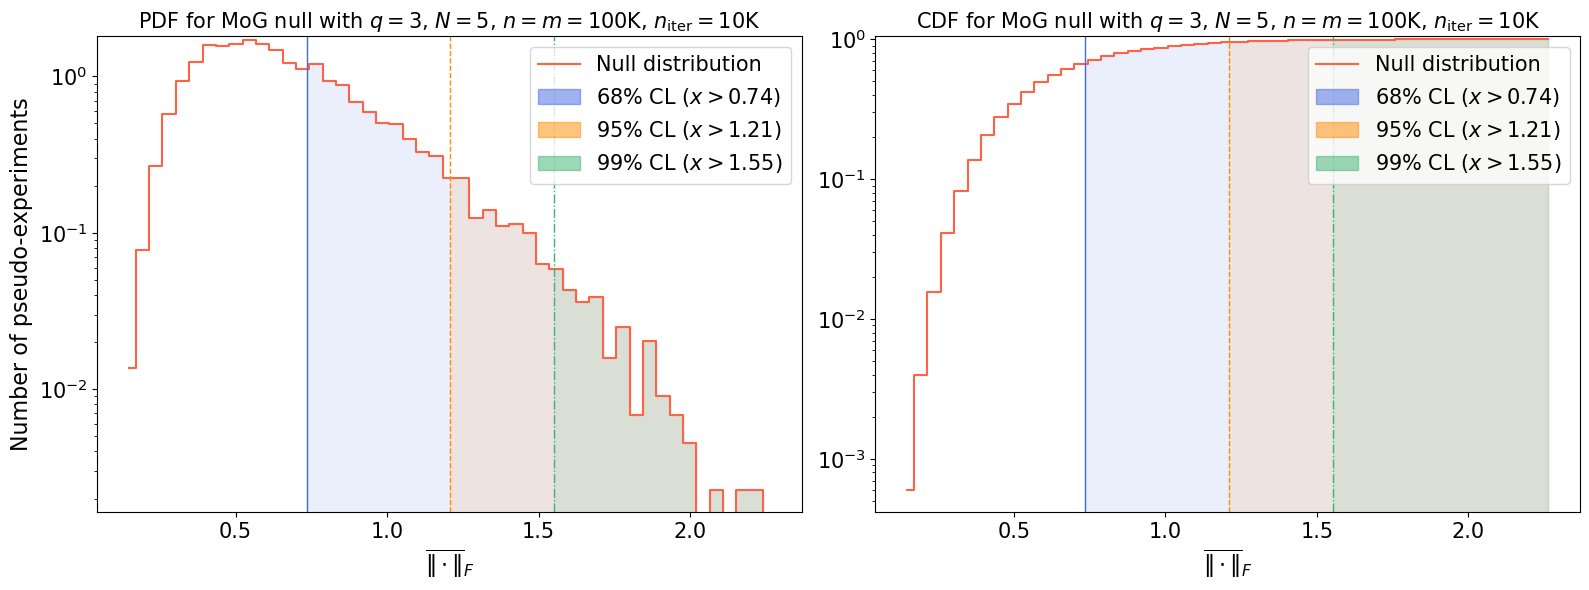

Time elapsed: 2.0509599409997463 seconds.
mu = 37.02778883763784 +/- 0.03963980832786093
sigma = 1.9909748448401081 +/- 0.03195568139975457


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


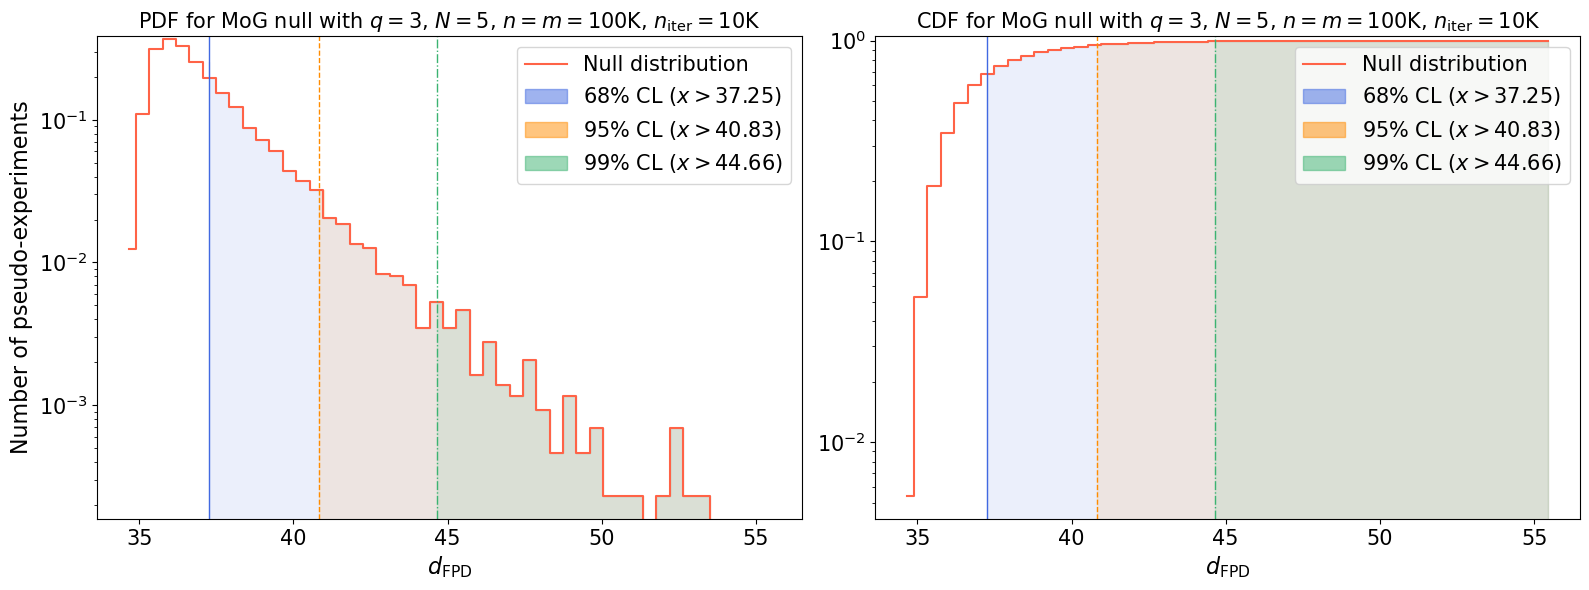

Time elapsed: 0.8834036625921726 seconds.
mu = -0.4925816476862341 +/- 0.003492597963052422
sigma = 0.5909820608996877 +/- 0.005617624547229015


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


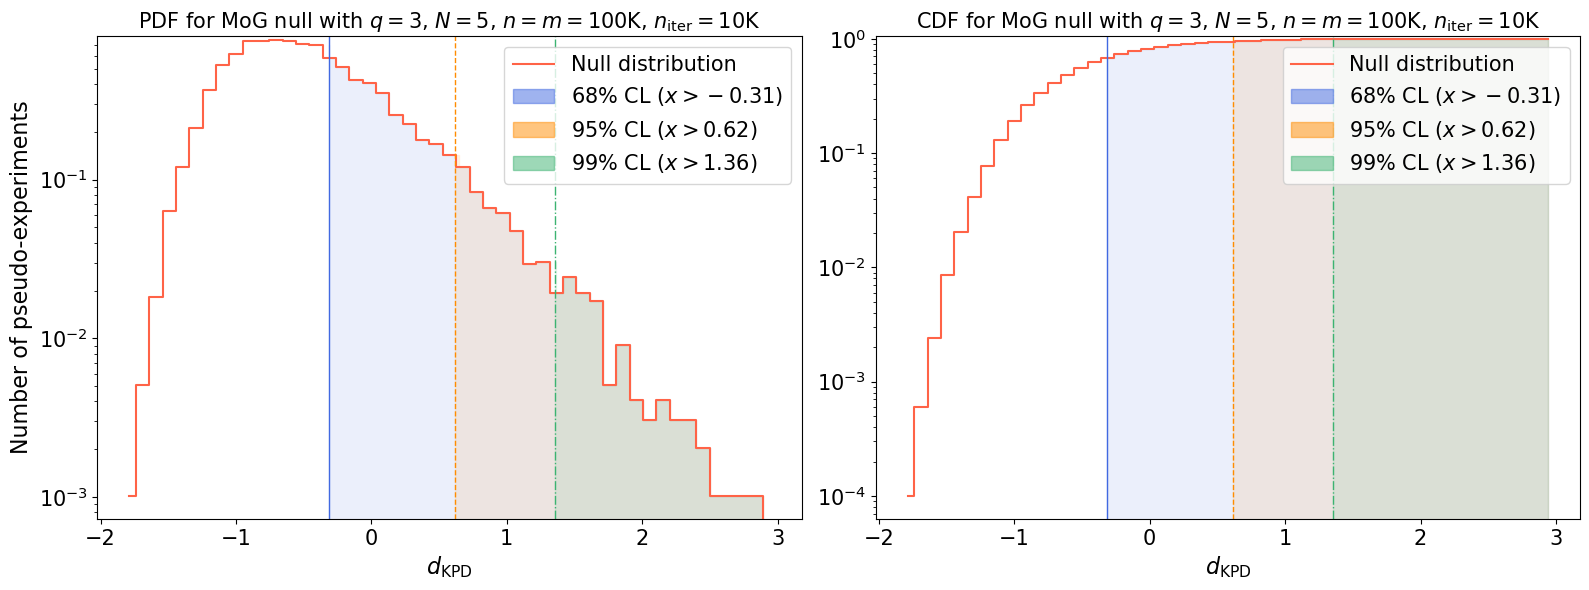

Time elapsed: 1.0065325312316418 seconds.
mu = 0.8665271329873165 +/- 0.00020824574654201643
sigma = 0.14430722315324912 +/- 0.0012537316073914547


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


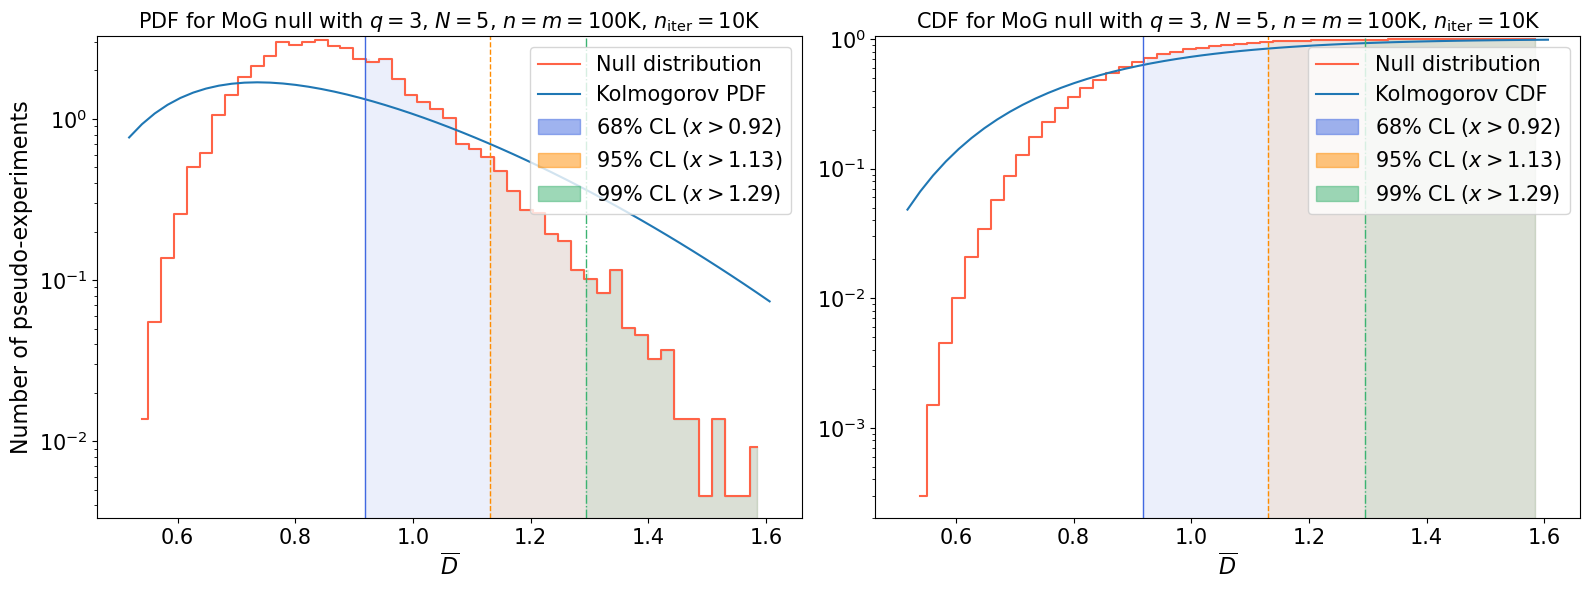

Time elapsed: 1.2519353069365025 seconds.
mu = 0.8687706212382323 +/- 0.00016790576448755427
sigma = 0.1295784567308757 +/- 0.0011105774188440378


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


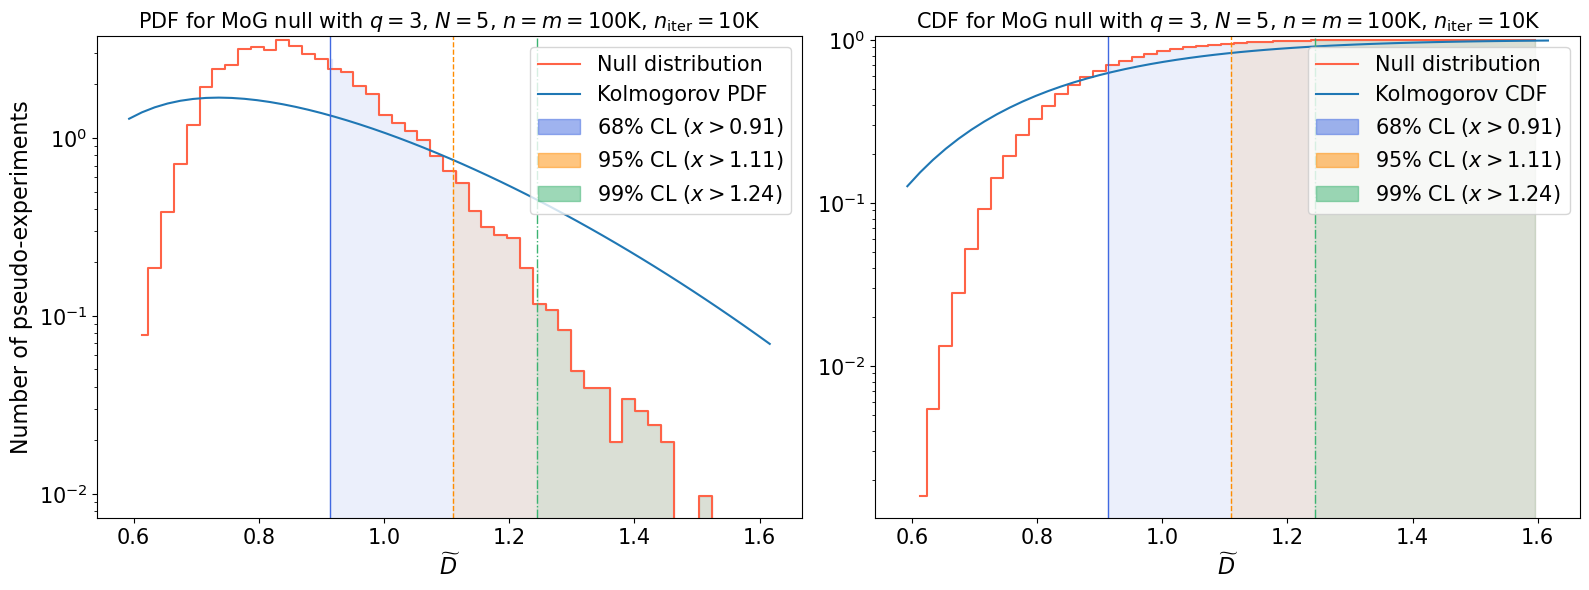

Time elapsed: 1.1908413544297218 seconds.
mu = 0.6352851213397198 +/- 0.0003261515345300682
sigma = 0.18059665958429802 +/- 0.0016476535051249965


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


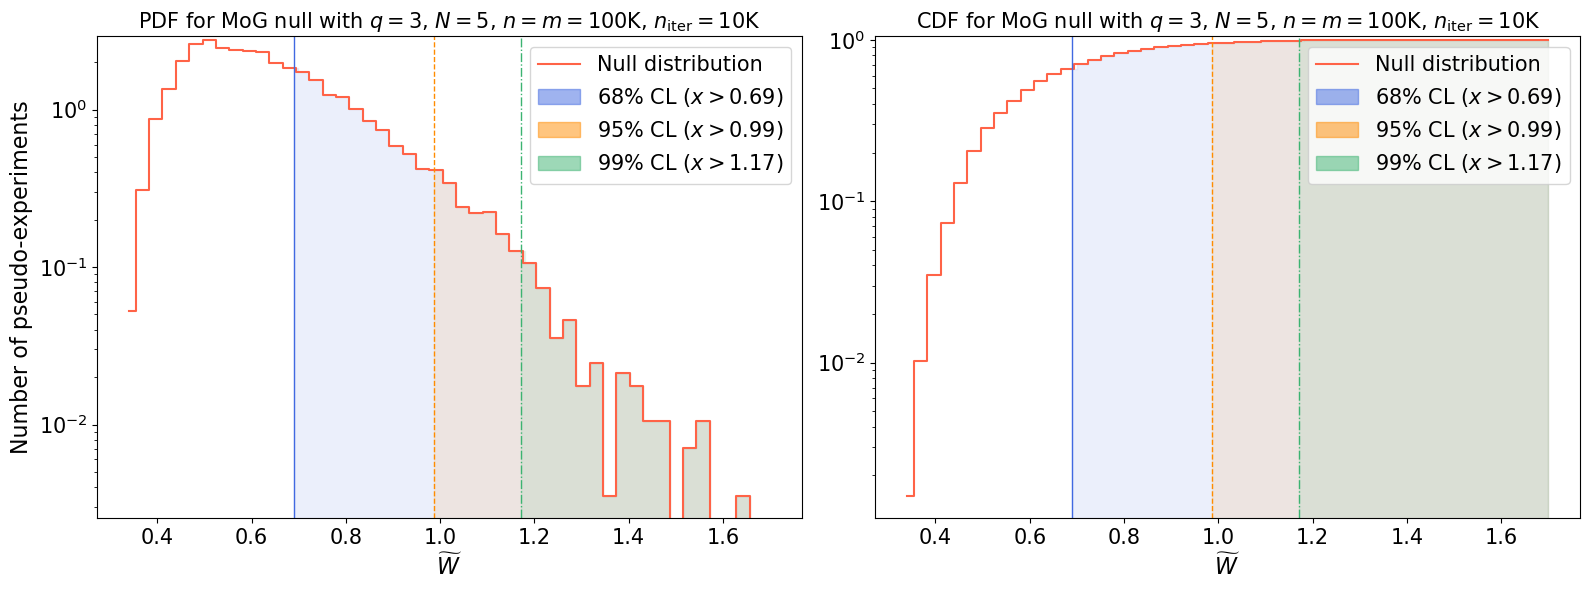

Time elapsed: 0.8988757058978081 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f34bca1a950>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$\overline{\|\cdot\|}_{F}$,../results/5D_100K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.7361861922632064], [0....",../results/5D_100K/null_hypothesis/FN.pdf
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f34bca1b9a0>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 100000, 'b...",100,$d_{\mathrm{FPD}}$,../results/5D_100K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 37.251270646687026], [0....",../results/5D_100K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f34bca1ba30>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2,$d_{\mathrm{KPD}}$,../results/5D_100K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], -0.3142445012023504], [0...",../results/5D_100K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f34bca1bac0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$\overline{D}$,../results/5D_100K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9176830381499299], [0....",../results/5D_100K/null_hypothesis/KS.pdf
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f34bca1bb50>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",40,$\widetilde{D}$,../results/5D_100K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9130317730915002], [0....",../results/5D_100K/null_hypothesis/SKS.pdf
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f34bca1bbe0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",40,$\widetilde{W}$,../results/5D_100K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.6903042605378654], [0....",../results/5D_100K/null_hypothesis/SWD.pdf
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f34bca1bc70>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",500,$t_{\mu}$,../results/5D_100K/null_hypothesis/LR.json,[],NaN


In [11]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [40]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [41]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [42]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [43]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [44]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Exclusion limits for LR with both deformation already loaded.
dict_keys(['2024-03-30T23:36:23.196303', '2024-03-30T23:39:18.276874', '2024-03-30T23:41:56.761177', '2024-03-30T23:45:27.571660', '2024-03-30T23:50:40.414849', '2024-03-30T23:55:07.825150', '2024-03-31T18:51:59.233439', '2024-03-31T19:01:29.977970', '2024-03-31T19:07:28.638886', '2024-03-31T10:59:30.672013', '2024-03-31T11:03:33.309540', '2024-03-31T11:06:57.830553', '2024-03-31T11:11:07.165041', '2024-03-31T11:16:23.829102', '2024-03-31T11:21:05.490653', '2024-03-31T11:26:33.806004', '2024-03-31T11:29:56.935791', '2024-03-31T11:33:08.023885', '2024-04-02T19:22:04.104980', '2024-04-02T23:10:39.005278', '2024-04-03T02:52:17.156396'])


### Show and save results

In [45]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [46]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [47]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,mean,5,10000,100000,0.00035,0.00048,13714
9,ks,mean,5,10000,100000,0.00319,0.00431,242
12,sks,mean,5,10000,100000,0.00833,0.01088,316
15,swd,mean,5,10000,100000,0.01587,0.02072,203
3,fpd,mean,5,10000,100000,0.02354,0.03205,312
0,fn,mean,5,10000,100000,0.02490,0.03209,175
6,kpd,mean,5,10000,100000,0.05905,0.07503,570


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,0.00035,0.00048,13714
9,ks,0.00319,0.00431,242
12,sks,0.00833,0.01088,316
15,swd,0.01587,0.02072,203
3,fpd,0.02354,0.03205,312
0,fn,0.02490,0.03209,175
6,kpd,0.05905,0.07503,570


In [48]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,std,5,10000,100000,0.00050,0.00072,13298
10,ks,std,5,10000,100000,0.00872,0.01161,204
13,sks,std,5,10000,100000,0.02158,0.02794,281
16,swd,std,5,10000,100000,0.03467,0.04449,191
4,fpd,std,5,10000,100000,0.04824,0.06502,267
1,fn,std,5,10000,100000,0.05332,0.07338,158
7,kpd,std,5,10000,100000,1.75293,2.01295,358


,Statistic,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,0.00050,0.00072,13298
10,ks,0.00872,0.01161,204
13,sks,0.02158,0.02794,281
16,swd,0.03467,0.04449,191
4,fpd,0.04824,0.06502,267
1,fn,0.05332,0.07338,158
7,kpd,1.75293,2.01295,358


In [49]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,both,5,10000,100000,0.00028,0.00039,13245
11,ks,both,5,10000,100000,0.00284,0.00380,249
14,sks,both,5,10000,100000,0.00774,0.01004,328
17,swd,both,5,10000,100000,0.01431,0.01857,204
5,fpd,both,5,10000,100000,0.02197,0.02967,331
2,fn,both,5,10000,100000,0.02295,0.02950,210
8,kpd,both,5,10000,100000,0.05936,0.07594,547


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,0.00028,0.00039,13245
11,ks,0.00284,0.00380,249
14,sks,0.00774,0.01004,328
17,swd,0.01431,0.01857,204
5,fpd,0.02197,0.02967,331
2,fn,0.02295,0.02950,210
8,kpd,0.05936,0.07594,547


In [50]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$t^{\mathrm{null}}$ (s)
0,$t_{\mathrm{LLR}}$,0.00035,0.00048,13714,0.00050,0.00072,13298,0.00028,0.00039,13245,-
1,$\overline{D}$,0.00319,0.00431,242,0.00872,0.01161,204,0.00284,0.00380,249,599
2,$\widetilde{D}$,0.00833,0.01088,316,0.02158,0.02794,281,0.00774,0.01004,328,3635
3,$\widetilde{W}$,0.01587,0.02072,203,0.03467,0.04449,191,0.01431,0.01857,204,1594
4,fpd,0.02354,0.03205,312,0.04824,0.06502,267,0.02197,0.02967,331,1547
5,fn,0.02490,0.03209,175,0.05332,0.07338,158,0.02295,0.02950,210,168
6,kpd,0.05905,0.07503,570,1.75293,2.01295,358,0.05936,0.07594,547,5519


\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.00035 & 0.00048 & 13714 & 0.0005 & 0.00072 & 13298 & 0.00028 & 0.00039 & 13245 & - \\
$\overline{D}$ & 0.0032 & 0.0043 & 242 & 0.0087 & 0.012 & 204 & 0.0028 & 0.0038 & 249 & 599 \\
$\widetilde{D}$ & 0.0083 & 0.011 & 316 & 0.022 & 0.028 & 281 & 0.0077 & 0.01 & 328 & 3635 \\
$\widetilde{W}$ & 0.016 & 0.021 & 203 & 0.035 & 0.044 & 191 & 0.014 & 0.019 & 204 & 1594 \\
fpd & 0.024 & 0.032 & 312 & 0.048 & 0.065 & 267 & 0.022 & 0.03 & 331 & 1547 \\
fn & 0.025 & 0.032 & 175 & 0.053 & 0.073 & 158 & 0.023 & 0.029 & 210 & 168 \\
kpd & 0.059 & 0.075 & 570 & 1.8 & 2 & 358 & 0.059 & 0.076 & 547 

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [ ]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
batch_size_test = 100_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value
    
test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,100000,1000,10000000,float64,0,True,False,None,True,...,5,0,True,5,0,float64,5,1000000000,False,3


In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 40,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 40,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 1000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 1000000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 1000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/5D_100K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'me

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and saving {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/5D_100K/null_hypothesis/FN.json
Computing and saving fpd with max_vectorize = 100

------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 10000
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 100 out of 10000 .


Iterating from 100 to 200 out of 10000 .
Iterating from 200 to 300 out of 10000 .
Iterating from 300 to 400 out of 10000 .
Iterating from 400 to 500 out of 10000 .
Iterating from 500 to 600 out of 10000 .
Iterating from 600 to 700 out of 10000 .
Iterating from 700 to 800 out of 10000 .
Iterating from 800 to 900 out of 10000 .
Iterating from 900 to 1000 out of 10000 .
Iterating from 1000 to 1100 out of 10000 .
Iterating from 1100 to 1200 out of 10000 .
Iterating from 1200 to 1300 out of 10000 .
Iterating from 1300 to 1400 out of 10000 .
Iterating from 1400 to 1500 out of 10000 .
Iterating from 1500 to 1600 out of 10000 .
Iterating from 1600 to 1700 out of 10000 .
Iterating from 1700 to 1800 out of 10000 .
Iterating from 1800 to 1900 out of 10000 .
Iterating from 1900 to 2000 out of 10000 .
Iterating from 2000 to 2100 out of 10000 .
Iterating from 2100 to 2200 out of 10000 .
Iterating from 2200 to 2300 out of 10000 .
Iterating from 2300 to 2400 out of 10000 .
Iterating from 2400 to 2500 

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7361861922632064], [0.95, [9500, 500], 1.208987279747196], [0.99, [9900, 100], 1.5515750576539578]]
Computing time for metric fn: 168.33948363177478
ThresholdS for metric fpd: [[0.68, [6800, 3199], 3.725127064668703e-05], [0.95, [9500, 500], 4.0825583153507725e-05], [0.99, [9900, 100], 4.465564257168013e-05]]
Computing time for metric fpd: 2689.5835560820997
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.3142445012023504], [0.95, [9500, 500], 0.6167540267704462], [0.99, [9900, 100], 1.356230980479935]]
Computing time for metric kpd: 5519.548523044214
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9176830381499299], [0.95, [9500, 500], 1.1310024029579901], [0.99, [9900, 100], 1.2946836170025309]]
Computing time for metric ks: 599.8905287217349
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9130317730915002], [0.95, [9500, 500], 1.109806524570458], [0.99, [9900, 100], 1.2448878209446645]]
Computing time for metric sks: 3635.27

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f0b3a603d90>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$\overline{\|\cdot\|}_{F}$,../results/5D_100K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.7361861922632064], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f063d7639a0>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 100000, 'b...",100,$d_{\mathrm{FPD}}$,../results/5D_100K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 3.725127064668703e-05], ..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f063d763a30>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2,$d_{\mathrm{KPD}}$,../results/5D_100K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], -0.3142445012023504], [0..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f063d763ac0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$\overline{D}$,../results/5D_100K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9176830381499299], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f063d763b50>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",40,$\widetilde{D}$,../results/5D_100K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9130317730915002], [0...."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f063d763be0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",40,$\widetilde{W}$,../results/5D_100K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.6903042605378654], [0...."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f063d763c70>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",500,$t_{\mu}$,../results/5D_100K/null_hypothesis/LR.json,[]


### Plots of null-distributions

mu = 0.6522880990564781 +/- 0.000828376926080816
sigma = 0.28781537938074403 +/- 0.0026971262414397755


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


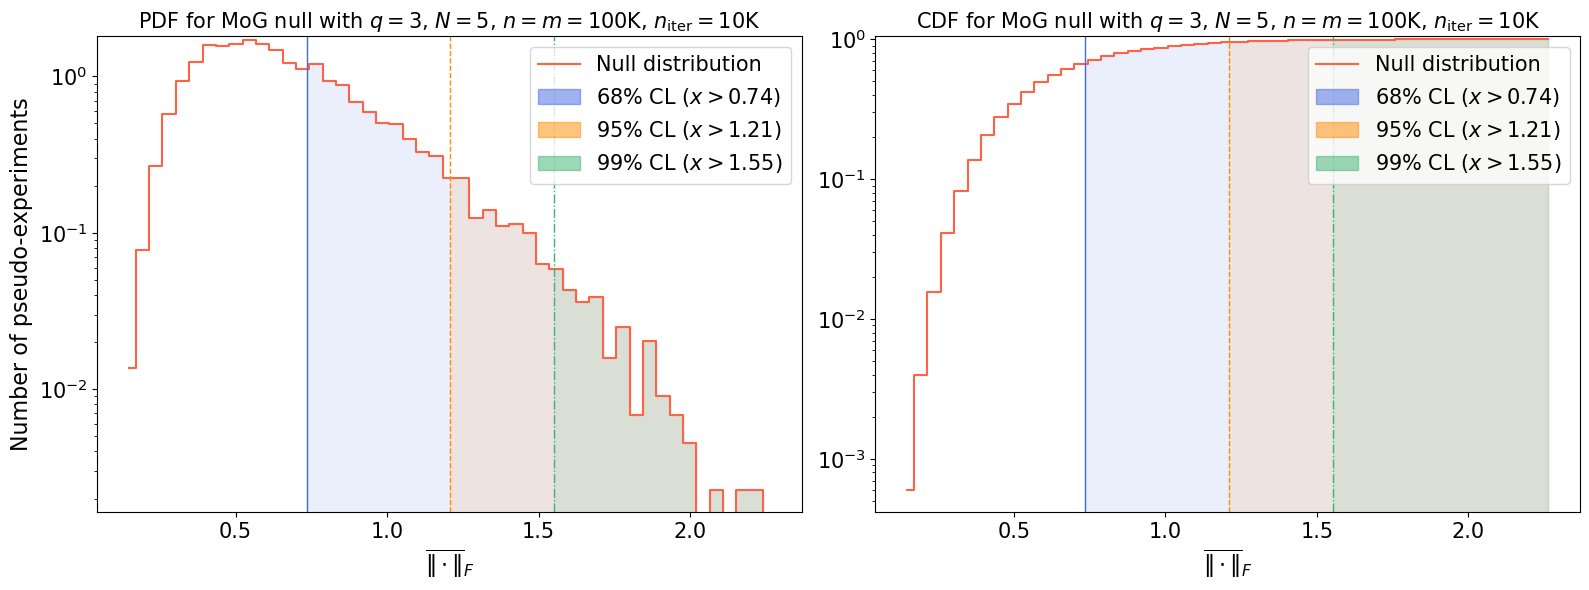

Time elapsed: 2.0509599409997463 seconds.
mu = 37.02778883763784 +/- 0.03963980832786093
sigma = 1.9909748448401081 +/- 0.03195568139975457


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


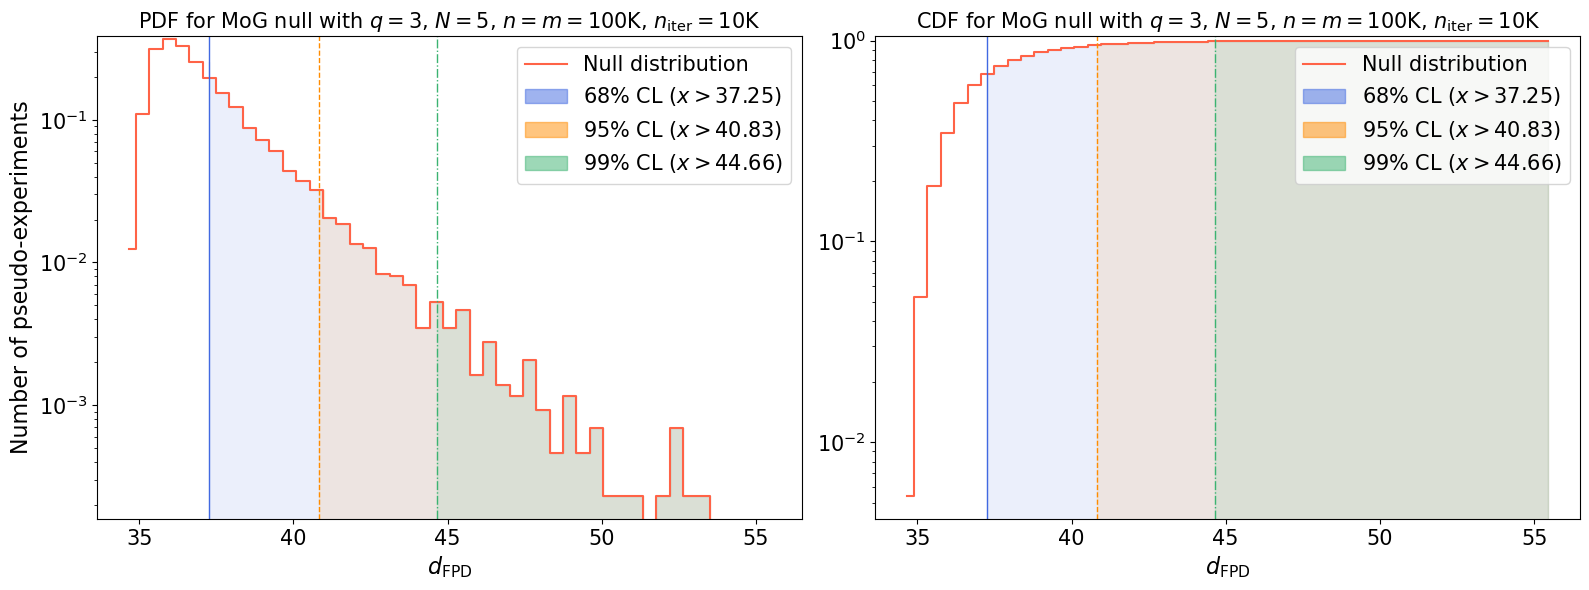

Time elapsed: 0.8834036625921726 seconds.
mu = -0.4925816476862341 +/- 0.003492597963052422
sigma = 0.5909820608996877 +/- 0.005617624547229015


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


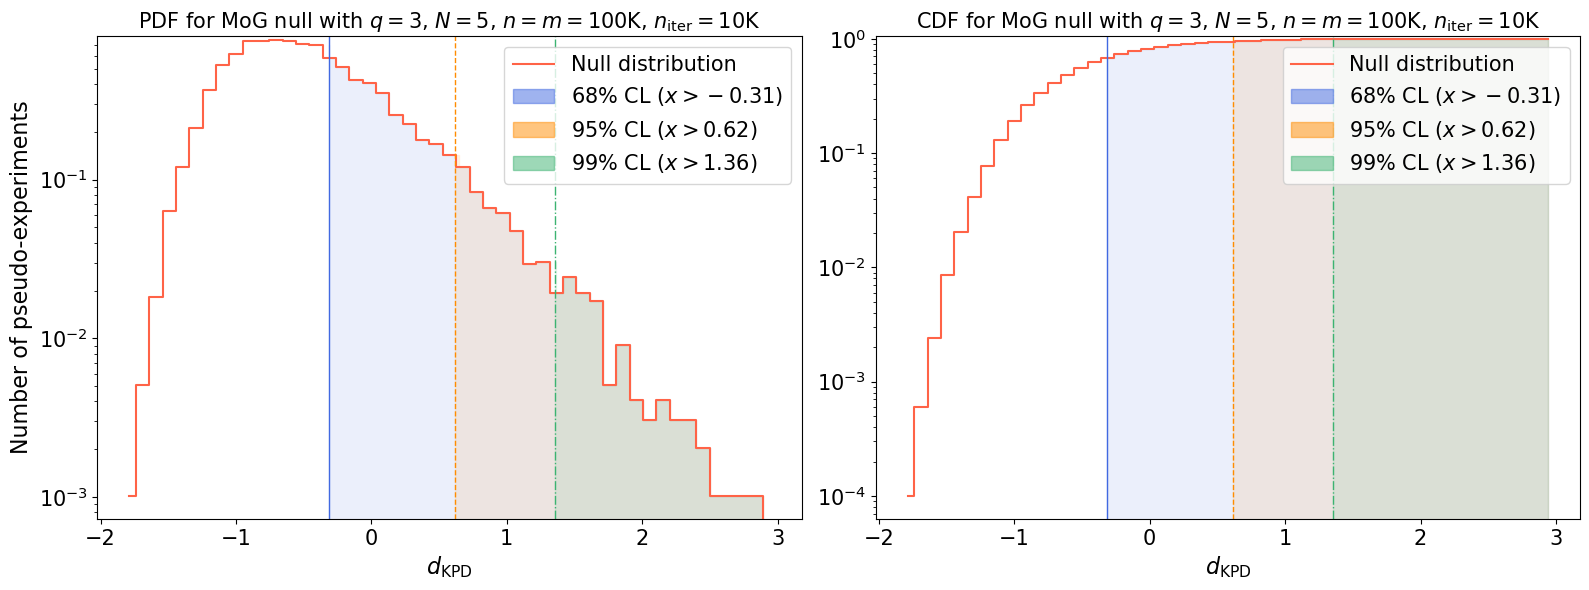

Time elapsed: 1.0065325312316418 seconds.
mu = 0.8665271329873165 +/- 0.00020824574654201643
sigma = 0.14430722315324912 +/- 0.0012537316073914547


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


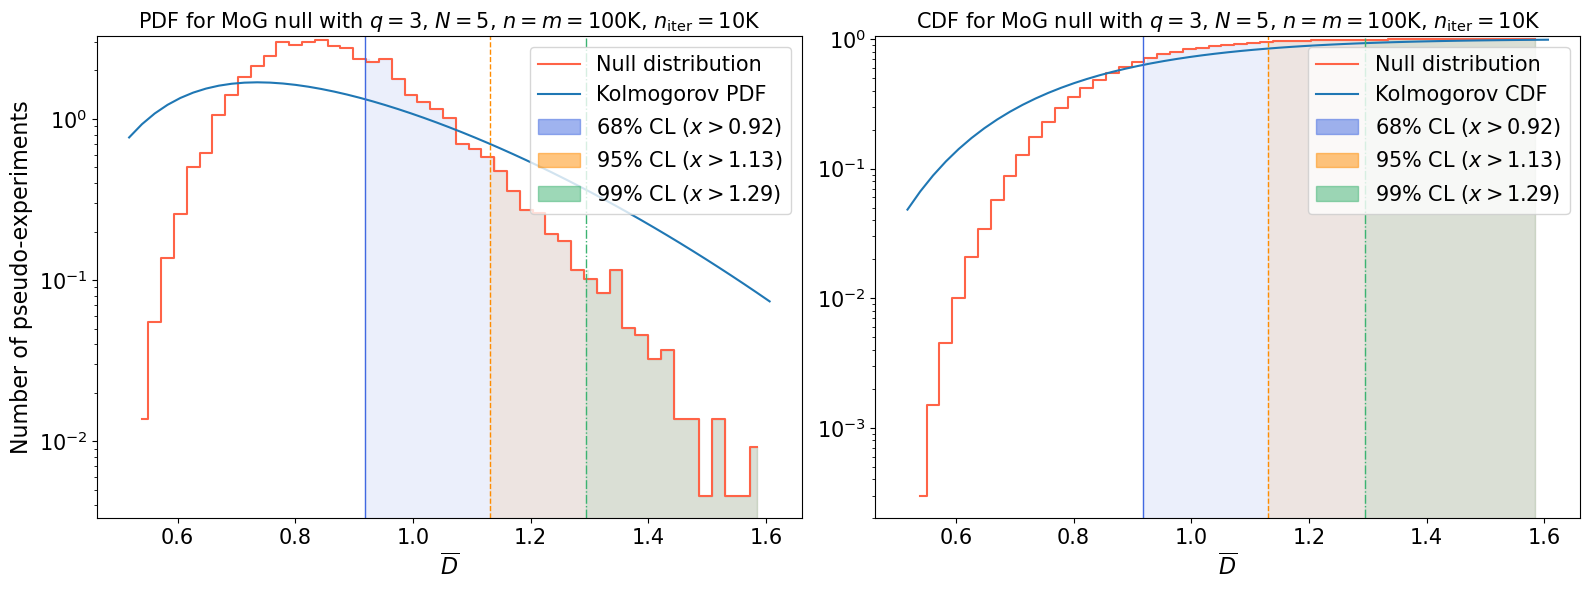

Time elapsed: 1.2519353069365025 seconds.
mu = 0.8687706212382323 +/- 0.00016790576448755427
sigma = 0.1295784567308757 +/- 0.0011105774188440378


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


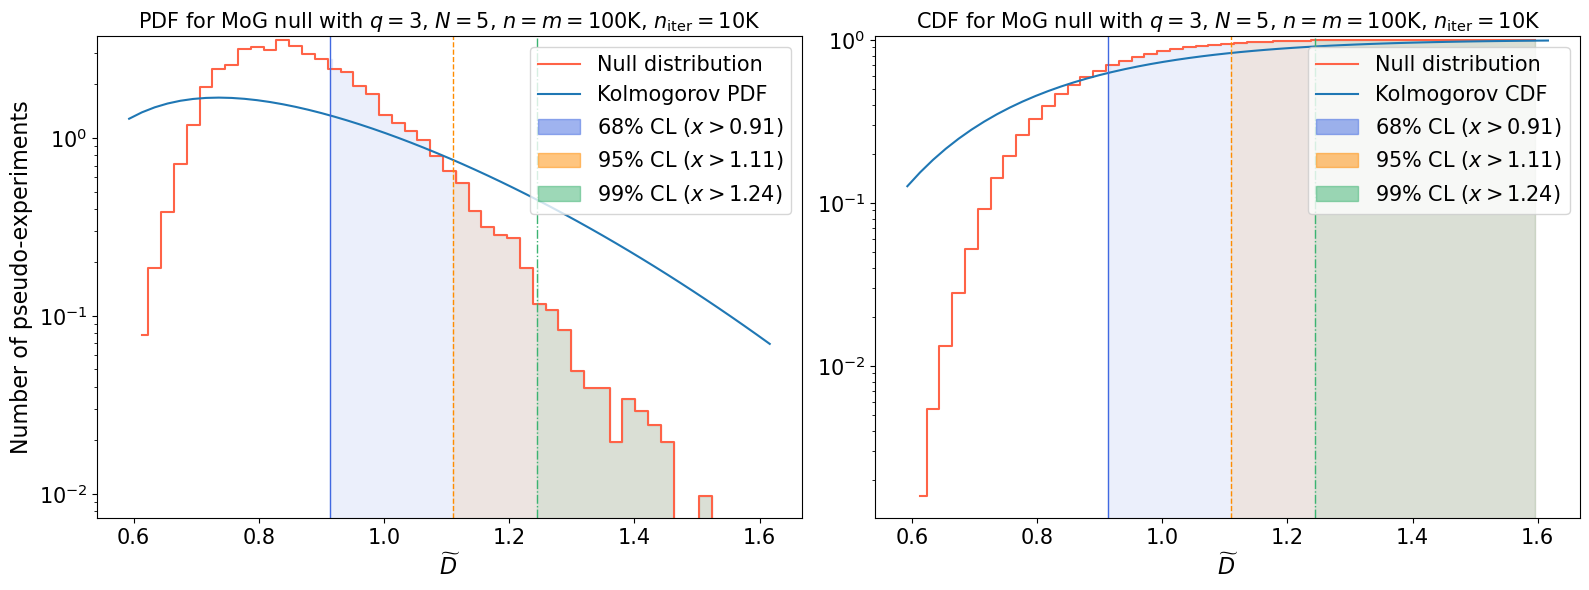

Time elapsed: 1.1908413544297218 seconds.
mu = 0.6352851213397198 +/- 0.0003261515345300682
sigma = 0.18059665958429802 +/- 0.0016476535051249965


/tmp/ipykernel_2657/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2657/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2657/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2657/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


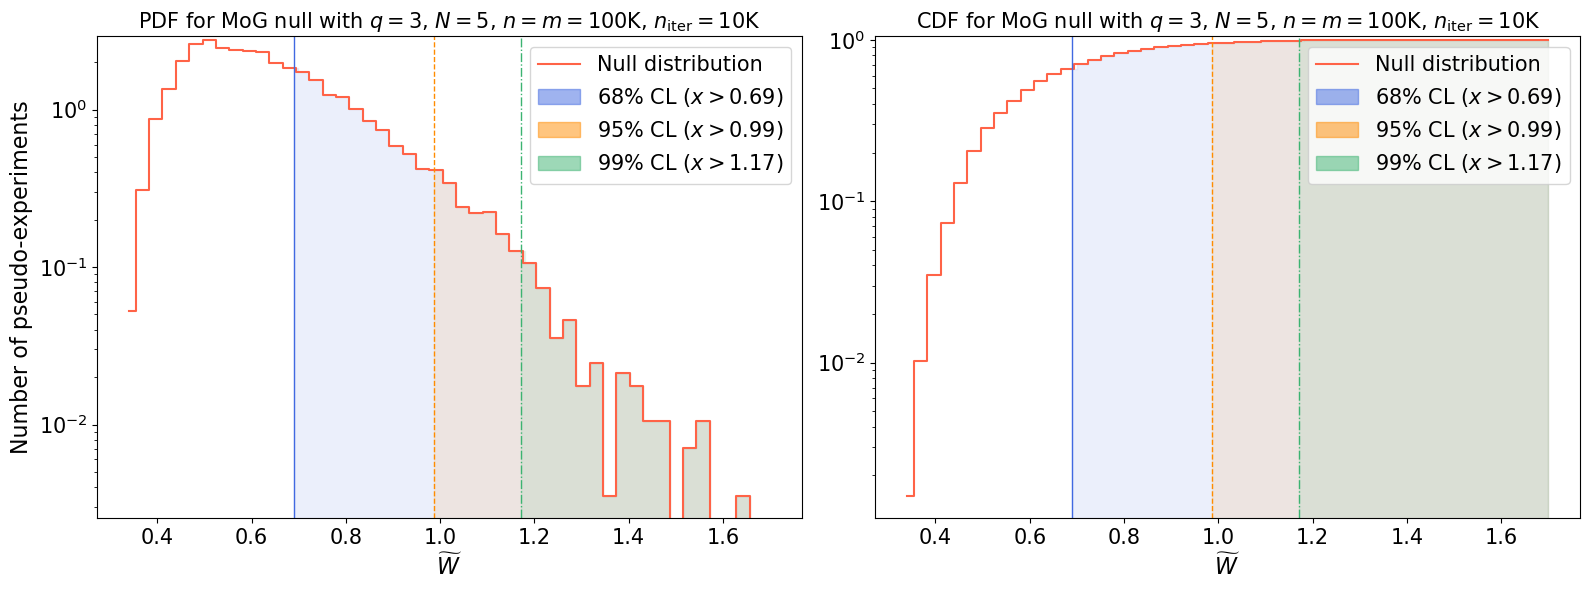

Time elapsed: 0.8988757058978081 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f34bca1a950>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$\overline{\|\cdot\|}_{F}$,../results/5D_100K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.7361861922632064], [0....",../results/5D_100K/null_hypothesis/FN.pdf
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f34bca1b9a0>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 100000, 'b...",100,$d_{\mathrm{FPD}}$,../results/5D_100K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 37.251270646687026], [0....",../results/5D_100K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f34bca1ba30>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",2,$d_{\mathrm{KPD}}$,../results/5D_100K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], -0.3142445012023504], [0...",../results/5D_100K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f34bca1bac0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$\overline{D}$,../results/5D_100K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9176830381499299], [0....",../results/5D_100K/null_hypothesis/KS.pdf
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f34bca1bb50>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",40,$\widetilde{D}$,../results/5D_100K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9130317730915002], [0....",../results/5D_100K/null_hypothesis/SKS.pdf
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f34bca1bbe0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",40,$\widetilde{W}$,../results/5D_100K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.6903042605378654], [0....",../results/5D_100K/null_hypothesis/SWD.pdf
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f34bca1bc70>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",500,$t_{\mu}$,../results/5D_100K/null_hypothesis/LR.json,[],NaN


In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Exclusion limits for LR with both deformation already loaded.
dict_keys(['2024-03-30T23:36:23.196303', '2024-03-30T23:39:18.276874', '2024-03-30T23:41:56.761177', '2024-03-30T23:45:27.571660', '2024-03-30T23:50:40.414849', '2024-03-30T23:55:07.825150', '2024-03-31T18:51:59.233439', '2024-03-31T19:01:29.977970', '2024-03-31T19:07:28.638886', '2024-03-31T10:59:30.672013', '2024-03-31T11:03:33.309540', '2024-03-31T11:06:57.830553', '2024-03-31T11:11:07.165041', '2024-03-31T11:16:23.829102', '2024-03-31T11:21:05.490653', '2024-03-31T11:26:33.806004', '2024-03-31T11:29:56.935791', '2024-03-31T11:33:08.023885', '2024-04-02T19:22:04.104980', '2024-04-02T23:10:39.005278', '2024-04-03T02:52:17.156396'])


### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,mean,5,10000,100000,0.00035,0.00048,13714
9,ks,mean,5,10000,100000,0.00319,0.00431,242
12,sks,mean,5,10000,100000,0.00833,0.01088,316
15,swd,mean,5,10000,100000,0.01587,0.02072,203
3,fpd,mean,5,10000,100000,0.02354,0.03205,312
0,fn,mean,5,10000,100000,0.02490,0.03209,175
6,kpd,mean,5,10000,100000,0.05905,0.07503,570


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,0.00035,0.00048,13714
9,ks,0.00319,0.00431,242
12,sks,0.00833,0.01088,316
15,swd,0.01587,0.02072,203
3,fpd,0.02354,0.03205,312
0,fn,0.02490,0.03209,175
6,kpd,0.05905,0.07503,570


In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,std,5,10000,100000,0.00050,0.00072,13298
10,ks,std,5,10000,100000,0.00872,0.01161,204
13,sks,std,5,10000,100000,0.02158,0.02794,281
16,swd,std,5,10000,100000,0.03467,0.04449,191
4,fpd,std,5,10000,100000,0.04824,0.06502,267
1,fn,std,5,10000,100000,0.05332,0.07338,158
7,kpd,std,5,10000,100000,1.75293,2.01295,358


,Statistic,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,0.00050,0.00072,13298
10,ks,0.00872,0.01161,204
13,sks,0.02158,0.02794,281
16,swd,0.03467,0.04449,191
4,fpd,0.04824,0.06502,267
1,fn,0.05332,0.07338,158
7,kpd,1.75293,2.01295,358


In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,both,5,10000,100000,0.00028,0.00039,13245
11,ks,both,5,10000,100000,0.00284,0.00380,249
14,sks,both,5,10000,100000,0.00774,0.01004,328
17,swd,both,5,10000,100000,0.01431,0.01857,204
5,fpd,both,5,10000,100000,0.02197,0.02967,331
2,fn,both,5,10000,100000,0.02295,0.02950,210
8,kpd,both,5,10000,100000,0.05936,0.07594,547


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,0.00028,0.00039,13245
11,ks,0.00284,0.00380,249
14,sks,0.00774,0.01004,328
17,swd,0.01431,0.01857,204
5,fpd,0.02197,0.02967,331
2,fn,0.02295,0.02950,210
8,kpd,0.05936,0.07594,547


In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$t^{\mathrm{null}}$ (s)
0,$t_{\mathrm{LLR}}$,0.00035,0.00048,13714,0.00050,0.00072,13298,0.00028,0.00039,13245,-
1,$\overline{D}$,0.00319,0.00431,242,0.00872,0.01161,204,0.00284,0.00380,249,599
2,$\widetilde{D}$,0.00833,0.01088,316,0.02158,0.02794,281,0.00774,0.01004,328,3635
3,$\widetilde{W}$,0.01587,0.02072,203,0.03467,0.04449,191,0.01431,0.01857,204,1594
4,fpd,0.02354,0.03205,312,0.04824,0.06502,267,0.02197,0.02967,331,1547
5,fn,0.02490,0.03209,175,0.05332,0.07338,158,0.02295,0.02950,210,168
6,kpd,0.05905,0.07503,570,1.75293,2.01295,358,0.05936,0.07594,547,5519


\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.00035 & 0.00048 & 13714 & 0.0005 & 0.00072 & 13298 & 0.00028 & 0.00039 & 13245 & - \\
$\overline{D}$ & 0.0032 & 0.0043 & 242 & 0.0087 & 0.012 & 204 & 0.0028 & 0.0038 & 249 & 599 \\
$\widetilde{D}$ & 0.0083 & 0.011 & 316 & 0.022 & 0.028 & 281 & 0.0077 & 0.01 & 328 & 3635 \\
$\widetilde{W}$ & 0.016 & 0.021 & 203 & 0.035 & 0.044 & 191 & 0.014 & 0.019 & 204 & 1594 \\
fpd & 0.024 & 0.032 & 312 & 0.048 & 0.065 & 267 & 0.022 & 0.03 & 331 & 1547 \\
fn & 0.025 & 0.032 & 175 & 0.053 & 0.073 & 158 & 0.023 & 0.029 & 210 & 168 \\
kpd & 0.059 & 0.075 & 570 & 1.8 & 2 & 358 & 0.059 & 0.076 & 547 

# Fixed $\epsilon$

In [20]:
fpd_results = {5: {10_000: [[0.68, 0.00010175550386551708], 
                            [0.95, 0.00015583746551772079], 
                            [0.99, 0.00022347410983350775]],
                   50_000: [[0.68, 4.5226688115357585e-05], 
                            [0.95, 5.398123973119404e-05], 
                            [0.99, 6.354077850007809e-05]],
                   100_000 : [[0.68, 3.725127064668703e-05], 
                              [0.95, 4.0825583153507725e-05], 
                              [0.99, 4.465564257168013e-05]],
                   200_000 : [[0.68, 3.3691504288769034e-05], 
                              [0.95, 3.5351867696872585e-05], 
                              [0.99, 3.68684570537516e-05]]},
               20: {10_000: [[0.68, 0.0006669445748113884], 
                             [0.95, 0.0013217846893085318], 
                             [0.99, 0.0019605548728214763]],
                    50_000: [[0.68, 0.00031117601754665936], 
                             [0.95, 0.00040269921440860503], 
                             [0.99, 0.000502723348035641]],
                    100_000 : [[0.68, 0.00015735387007512796], 
                               [0.95, 0.0001991294338873111], 
                               [0.99, 0.00028358152805583374]]},
               100: {10_000: [[0.68, 0.0060367495598200515], 
                              [0.95, 0.009021833572706342], 
                              [0.99, 0.011125954730711617]],
                     50_000: [[0.68, 0.0012229712948642107], 
                              [0.95, 0.001787009273603958], 
                              [0.99, 0.0022351123346437667]],
                    100_000 : [[0.68, 0.000817842570244682], 
                               [0.95, 0.0011978135448655475], 
                               [0.99, 0.001414743609381014]]}}
fpd_results

{5: {10000: [[0.68, 0.00010175550386551708],
   [0.95, 0.00015583746551772079],
   [0.99, 0.00022347410983350775]],
  50000: [[0.68, 4.5226688115357585e-05],
   [0.95, 5.398123973119404e-05],
   [0.99, 6.354077850007809e-05]],
  100000: [[0.68, 3.725127064668703e-05],
   [0.95, 4.0825583153507725e-05],
   [0.99, 4.465564257168013e-05]],
  200000: [[0.68, 3.3691504288769034e-05],
   [0.95, 3.5351867696872585e-05],
   [0.99, 3.68684570537516e-05]]},
 20: {10000: [[0.68, 0.0006669445748113884],
   [0.95, 0.0013217846893085318],
   [0.99, 0.0019605548728214763]],
  50000: [[0.68, 0.00031117601754665936],
   [0.95, 0.00040269921440860503],
   [0.99, 0.000502723348035641]],
  100000: [[0.68, 0.00015735387007512796],
   [0.95, 0.0001991294338873111],
   [0.99, 0.00028358152805583374]]},
 100: {10000: [[0.68, 0.0060367495598200515],
   [0.95, 0.009021833572706342],
   [0.99, 0.011125954730711617]],
  50000: [[0.68, 0.0012229712948642107],
   [0.95, 0.001787009273603958],
   [0.99, 0.0022351123

In [21]:
def define_norm_df(dic,x,y):
    # Flatten the dictionary to a list of rows
    rows = []
    for N, n_dict in dic.items():
        for n, values in n_dict.items():
            row = {'N': N, 'n': n}
            for confidence, value in values:
                row[confidence] = value*(N**x)*(n**y)
            rows.append(row)

    # Convert the list of rows to a DataFrame
    df = pd.DataFrame(rows)

    # Optionally, rename the columns for clarity
    df.rename(columns={0.68: '0.68', 0.95: '0.95', 0.99: '0.99'}, inplace=True)
    return df

df = define_norm_df(fpd_results,0.,0.)
# Show the DataFrame
display(df)

,N,n,0.68,0.95,0.99
0,5,10000,0.000102,0.000156,0.000223
1,5,50000,0.000045,0.000054,0.000064
2,5,100000,0.000037,0.000041,0.000045
3,5,200000,0.000034,0.000035,0.000037
4,20,10000,0.000667,0.001322,0.001961
5,20,50000,0.000311,0.000403,0.000503
6,20,100000,0.000157,0.000199,0.000284
7,100,10000,0.006037,0.009022,0.011126
8,100,50000,0.001223,0.001787,0.002235
9,100,100000,0.000818,0.001198,0.001415
